In [1]:
from environment import Environment
from RL import alternate_q_learning, q_learning, discretize_state, bins
import plotting
import numpy as np

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = Environment()

In [6]:
Q,stats = q_learning(env, 5000)

Episode 5000/5000.

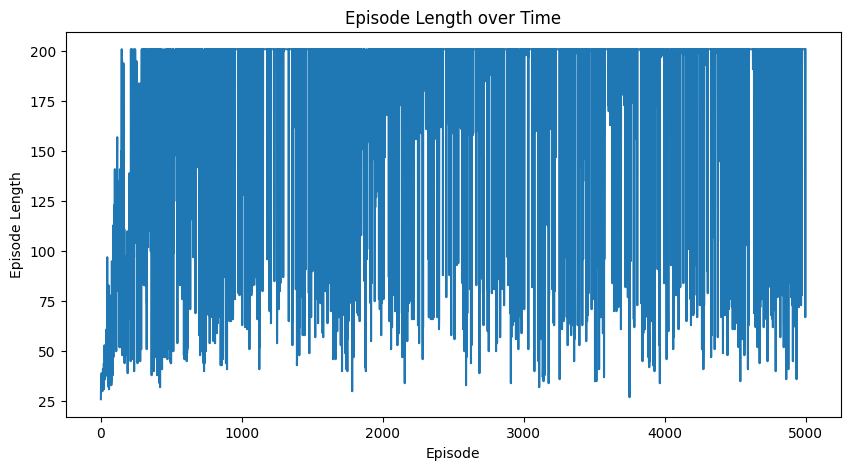

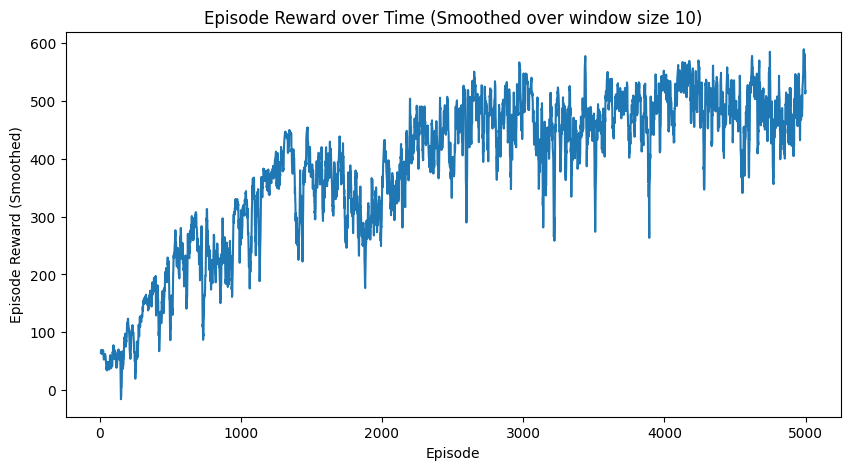

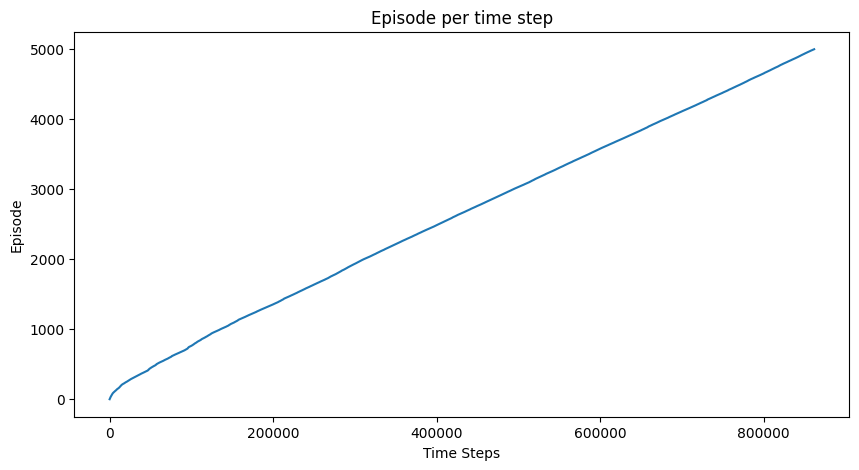

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [7]:
plotting.plot_episode_stats(stats)

In [9]:
import pygame

# Example usage
env = Environment()
state = env.reset()
observation = discretize_state(state, bins)
done = False


# Initialize Pygame
pygame.init()

# Set up display
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Satellite Collision Avoidance")

# Colors
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
blue = (0, 0, 255)


# Main loop
clock = pygame.time.Clock()
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    # Select an action from the policy
    action = env.action_space[np.argmax(Q[observation])]
    print("action:", action, "discretized_state: ", observation, "value: ", Q[observation])
    state, reward, done, termination_status = env.step(action)
    observation = discretize_state(state, bins)

    # Draw the environment
    env.draw(screen, width, height)

    # Cap the frame rate
    clock.tick(30)

    # Print status
    # print(f"State: {state}, Reward: {reward}, Done: {done}, Termination Cause: {termination_status}")

pygame.quit()


action: 0 discretized_state:  (np.int64(1), np.int64(10), np.int64(1), np.int64(5), np.int64(5), ((np.int64(10), np.int64(20), np.int64(5), np.int64(5)), (np.int64(10), np.int64(20), np.int64(5), np.int64(5)), (np.int64(10), np.int64(20), np.int64(5), np.int64(5)), (np.int64(10), np.int64(20), np.int64(5), np.int64(5)))) value:  [323.6638022  376.56789119 323.03510813]
action: -1 discretized_state:  (np.int64(1), np.int64(10), np.int64(1), np.int64(5), np.int64(5), ((np.int64(10), np.int64(19), np.int64(5), np.int64(5)), (np.int64(10), np.int64(19), np.int64(5), np.int64(5)), (np.int64(10), np.int64(19), np.int64(5), np.int64(5)), (np.int64(10), np.int64(19), np.int64(5), np.int64(5)))) value:  [372.85745    330.79765229 327.11326197]
action: 1 discretized_state:  (np.int64(1), np.int64(10), np.int64(1), np.int64(5), np.int64(4), ((np.int64(10), np.int64(19), np.int64(5), np.int64(5)), (np.int64(10), np.int64(19), np.int64(5), np.int64(5)), (np.int64(10), np.int64(19), np.int64(5), np.

In [16]:
Q.__sizeof__()

36944